In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Lab 2 - Thermodynamic assessment of microelectrodes

Notes for the thermal conductivity measurement:
 
1. Use the geometrical details provided for both samples and for the heat-flux sensor

2. Use the heat flux value that actually flows through the sample area, not the average over the sensor’s entire active area.

'Surface_Temperature.xlsx'
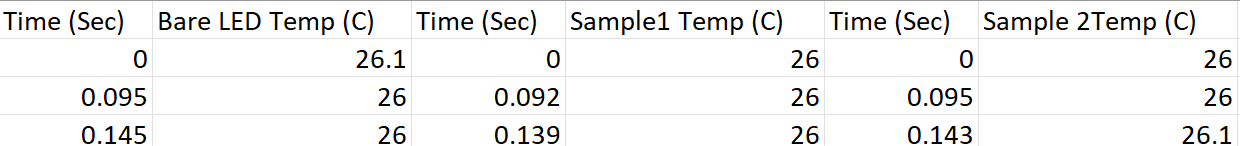

1. Surface Temperature Measurement and Comparison 

- Test two thin film samples. Measure the surface temperature using both an infrared (IR) camera and a thin film thermocouple.
- Prepare a comparison plot of temperature vs. time showing both the heat source temperature and the thin film surface temperature.

In [2]:
surface_temp_df = pd.read_excel('data/Surface_Temperature.xlsx', 
                               sheet_name='Sheet1')

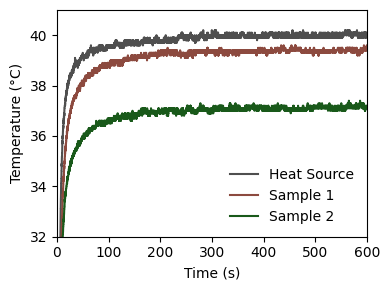

In [3]:
# fall theme colors
fall_red = '#D1495B'
fall_brown = '#8C4A3F'
fall_green = "#19591A"
gray = '#4F4F4F'
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(surface_temp_df['Time (Sec)'], surface_temp_df['Bare LED Temp (C)'], label='Heat Source', color=gray)
ax.plot(surface_temp_df['Time (Sec).1'], surface_temp_df['Sample1 Temp (C)'], label='Sample 1', color=fall_brown)
ax.plot(surface_temp_df['Time (Sec).2'], surface_temp_df['Sample 2Temp (C)'], label='Sample 2', color=fall_green)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temperature (°C)')
ax.set_ylim(32, 41)
ax.legend(frameon=False)
ax.set_xlim(0, 600)
plt.tight_layout()
plt.show()
# fig.savefig('figs/surface_temperature_comparison.pdf', dpi=300, bbox_inches='tight')

'Thermal Conductivity_measurement.xlsx'
Sample1, Sample2, Geometries

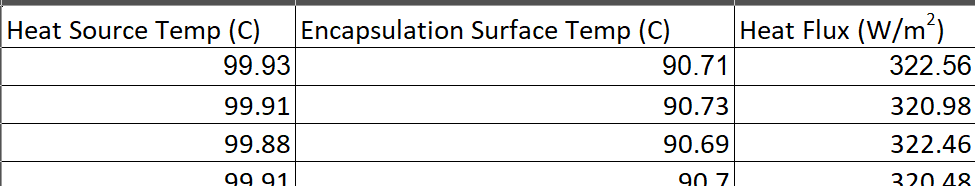

| Samples | Thickness (mm) | width (cm) | Length (cm) |
|---------|-------|------------|-------------|
| Sample 1| 0.25    | 0.3   | 0.9   |
| Sample 2| 0.251    | 0.3      | 0.9|

Heat flux sensor geometry:

Total sensing Area = 6.4516 cm^2

---------------------------------

2. Thermal Conductivity Evaluation

- Measure thermal conductivity of both thin film samples using our customized experimental setup (will be discussed during class).

- Calculate thermal conductivity and compare them. If differences are observed, provide a technical explanation for the discrepancy.

- Clearly state whether the measured conductivity corresponds to in-plane or through-plane behavior.

$k_p = \frac{QH}{A \Delta T} = \rho \times C_p \times D$

In [4]:
conductivity_df_1 = pd.read_excel('data/Thermal Conductivity_measurement.xlsx',
                                    sheet_name='Sample1', 
                            )
conductivity_df_2 = pd.read_excel('data/Thermal Conductivity_measurement.xlsx',
                                    sheet_name='Sample2')
# rename columns for clarity
conductivity_df_1.columns = ['T1', 'T2', 'Q']
conductivity_df_2.columns = ['T1', 'T2', 'Q']
H1 = 0.25e-3 # m
H2 = 0.251e-3 # m
A = 0.3e-2 * 0.9e-2 # m^2
# convert Q with area ratio
sensor_area = 6.4516e-4 # m^2
area_ratio = sensor_area / A
conductivity_df_1['Q'] = conductivity_df_1['Q'] * area_ratio
conductivity_df_2['Q'] = conductivity_df_2['Q'] * area_ratio

In [5]:
# k_p = flux * thickness / (area * delta T)
conductivity_df_1['k_p'] = conductivity_df_1['Q'] * H1 / ((conductivity_df_1['T1'] - conductivity_df_1['T2']))
conductivity_df_2['k_p'] = conductivity_df_2['Q'] * H2 / ((conductivity_df_2['T1'] - conductivity_df_2['T2']))
print(f"Sample 1 Kp: {np.mean(conductivity_df_1['k_p']):.4f} W/mK +/- {2*np.std(conductivity_df_1['k_p']):.4f} W/mK")
print(f"Sample 2 Kp: {np.mean(conductivity_df_2['k_p']):.4f} W/mK +/- {2* np.std(conductivity_df_2['k_p']):.4f} W/mK")

### bad plot since only 2 data point :( ###

# plt.figure(figsize=(4, 3))
# x_pos = [0.8, 1.2]  # Closer positions
# sample_names = ['Sample 1', 'Sample 2']

# plt.scatter(x_pos[0], np.mean(conductivity_df_1['k_p']), label='Sample 1', color=fall_brown)
# plt.scatter(x_pos[1], np.mean(conductivity_df_2['k_p']), label='Sample 2', color=fall_green)
# plt.errorbar(x_pos[0], np.mean(conductivity_df_1['k_p']), yerr=np.std(conductivity_df_1['k_p']), fmt='o', color=fall_brown)
# plt.errorbar(x_pos[1], np.mean(conductivity_df_2['k_p']), yerr=np.std(conductivity_df_2['k_p']), fmt='o', color=fall_green)

# plt.xticks(x_pos, sample_names)
# plt.xlim(0.5, 1.5)  # Tight x-axis limits
# plt.ylabel('Thermal Conductivity (W/mK)')
# plt.ylim(0, 1200)

Sample 1 Kp: 0.1927 W/mK +/- 0.0146 W/mK
Sample 2 Kp: 0.6926 W/mK +/- 0.0444 W/mK


Sample 2 was doped

Kind of sucks to read - hella sample and Time (s) cols

3. Thermal Fatigue Analysis
- Apply thermal fatigue loads at varying frequencies (0.5 Hz and 2 Hz). Record and compare the surface thermal profiles of both samples under these conditions.
- Prepare a comparison plot and discuss possible reasons for any differences observed. Why is thermal fatigue analysis important and what are the factors/conditions that alter thermal profiles under fatigue?

In [6]:
tf_s1_half_hz = pd.read_excel('data/Thermal Fatigue.xlsx', sheet_name='S1-0.5Hz')
tf_s1_2_hz = pd.read_excel('data/Thermal Fatigue.xlsx', sheet_name='S1-2Hz')

tf_s2_half_hz = pd.read_excel('data/Thermal Fatigue.xlsx', sheet_name='S2-0.5Hz')
tf_s2_2_hz = pd.read_excel('data/Thermal Fatigue.xlsx', sheet_name='S2-2Hz')

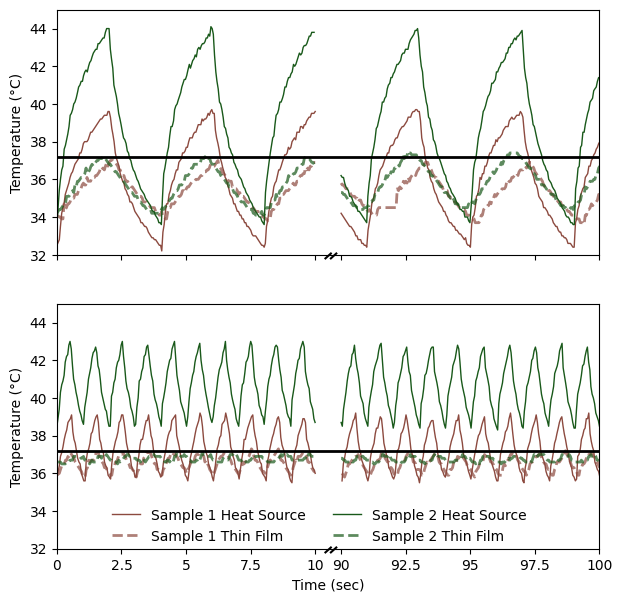

In [55]:
def plot_thermal_fatigue_comparison():
    fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
    
    # Data sets
    datasets = {
        '0.5 Hz': [(tf_s1_half_hz, 'Sample 1'), (tf_s2_half_hz, 'Sample 2')],
        '2 Hz': [(tf_s1_2_hz, 'Sample 1'), (tf_s2_2_hz, 'Sample 2')]
    }
    
    colors = {'Sample 1': fall_brown, 'Sample 2': fall_green}
    
    for i, (freq, samples) in enumerate(datasets.items()):
        ax = axes[i]
        
        for df, sample_name in samples:
            first_10_mask = df['Time (S)'] <= 10
            led_first = df[first_10_mask]['Bare LED Temperatre (C)']
            encap_first = df[first_10_mask]['encapsulation_surface_temp (C)']
            time_first = df[first_10_mask]['Time (S)']
            
            # Get last 10 seconds 
            last_10_mask = df['Time (S)'] >= 87
            led_last = df[last_10_mask]['Bare LED Temperatre (C)']
            encap_last = df[last_10_mask]['encapsulation_surface_temp (C)']
            time_last = df[last_10_mask]['Time (S)'] - 87 + 11  # Shift to continue x-axis
            
            color = colors[sample_name]
            
            ax.plot(time_first, led_first, color=color, linewidth=1, 
                   label=f'{sample_name} Heat Source' if i == 0 else "")
            ax.plot(time_first, encap_first, color=color, linewidth=2, 
                   linestyle='--', alpha=0.7,
                   label=f'{sample_name} Thin Film' if i == 0 else "")
        
            ax.plot(time_last, led_last, color=color, linewidth=1)
            ax.plot(time_last, encap_last, color=color, linewidth=2, 
                   linestyle='--', alpha=0.7)
            ax.set_ylim(32, 45)

        ax.axhline(y=37.2, color='black', linestyle='-', alpha=1, linewidth=2)
        ax.set_ylabel('Temperature (°C)')

        d = .005  # how big to make the diagonal lines
        kwargs = dict(transform=ax.transAxes, color='black', clip_on=False)
        ax.plot((.5 - d, .5 + d), (-d*3, +d), **kwargs)
        ax.plot((.51 - d, .51 + d), (-d*3, +d), **kwargs)

        

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', 
               frameon=False, ncol=2, bbox_to_anchor=(0.5, 0.1))
        
    axes[1].set_xlabel('Time (s)')
    axes[1].set_xlim(0, 21)
    axes[1].set_xticks([0, 2.5, 5, 7.5, 10, 11, 13.5, 16, 18.5, 21])
    axes[1].set_xticklabels(['0', '2.5', '5', '7.5', '10', '90', '92.5', '95', '97.5', '100'])
    axes[1].set_xlabel('Time (sec)')
    
    return fig

figure = plot_thermal_fatigue_comparison()
figure.savefig('figs/thermal_fatigue_loading.pdf', dpi=300, bbox_inches='tight')

In [8]:
# mean temperatures
print(f"S1, 0.5 Hz - LED Mean Temp: {np.mean(tf_s1_half_hz['Bare LED Temperatre (C)']):.2f} C")
print(f"S1, 2 Hz - LED Mean Temp: {np.mean(tf_s1_2_hz['Bare LED Temperatre (C)']):.2f} C")
print(f"S2, 0.5 Hz - LED Mean Temp: {np.mean(tf_s2_half_hz['Bare LED Temperatre (C)']):.2f} C")
print(f"S2, 2 Hz - LED Mean Temp: {np.mean(tf_s2_2_hz['Bare LED Temperatre (C)']):.2f} C")

print(f"S1, 0.5 Hz - Encapsulation Mean Temp: {np.mean(tf_s1_half_hz['encapsulation_surface_temp (C)']):.2f} C")
print(f"S1, 2 Hz - Encapsulation Mean Temp: {np.mean(tf_s1_2_hz['encapsulation_surface_temp (C)']):.2f} C")
print(f"S2, 0.5 Hz - Encapsulation Mean Temp: {np.mean(tf_s2_half_hz['encapsulation_surface_temp (C)']):.2f} C")
print(f"S2, 2 Hz - Encapsulation Mean Temp: {np.mean(tf_s2_2_hz['encapsulation_surface_temp (C)']):.2f} C")

S1, 0.5 Hz - LED Mean Temp: 36.06 C
S1, 2 Hz - LED Mean Temp: 37.34 C
S2, 0.5 Hz - LED Mean Temp: 38.93 C
S2, 2 Hz - LED Mean Temp: 40.66 C
S1, 0.5 Hz - Encapsulation Mean Temp: 35.44 C
S1, 2 Hz - Encapsulation Mean Temp: 36.52 C
S2, 0.5 Hz - Encapsulation Mean Temp: 35.79 C
S2, 2 Hz - Encapsulation Mean Temp: 36.73 C


## Thermal Fatigue Analysis Results

| Sample | Freq(Hz) | Mean heat source Temp (°C) | Mean film temp (°C) |
|--------|----------------|-------------------|------------------------------|
| S1     | 0.5           | 36.06             | 35.44                        |
| S1     | 2.0           | 37.34             | 36.52                        |
| S2     | 0.5           | 38.93             | 35.79                        |
| S2     | 2.0           | 40.66             | 36.73                        |

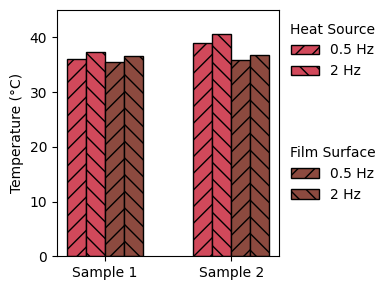

In [9]:
# good thermal fatigue figure - bar plot 
fig, ax = plt.subplots(figsize=(4, 3))
led_temps = {
    'S1_0.5Hz': 36.06, 'S1_2Hz': 37.34, 'S2_0.5Hz': 38.93, 'S2_2Hz': 40.66
}
encap_temps = {
    'S1_0.5Hz': 35.44, 'S1_2Hz': 36.52, 'S2_0.5Hz': 35.79, 'S2_2Hz': 36.73
}

# positioning
bar_width = 0.15
x_pos = np.array([0, 1])  # Sample 1 and Sample 2 positions
# bar_width = bar_width * 1.2  # Space between bar groups

hash1 = '//'
hash2 = '\\\\'

# LED temperatures (heat source)
s1_led_05 = ax.bar(x_pos[0] - bar_width*1.5, led_temps['S1_0.5Hz'], bar_width, 
                   color=fall_red, label='LED 0.5 Hz', hatch=hash1, 
                   edgecolor='black', linewidth=1)
s1_led_2 = ax.bar(x_pos[0] - bar_width*0.5, led_temps['S1_2Hz'], bar_width, 
                  color=fall_red, label='LED 2 Hz', hatch=hash2, 
                  edgecolor='black', linewidth=1)

s2_led_05 = ax.bar(x_pos[1] - bar_width*1.5, led_temps['S2_0.5Hz'], bar_width, 
                   color=fall_red, hatch=hash1, 
                   edgecolor='black', linewidth=1)
s2_led_2 = ax.bar(x_pos[1] - bar_width*0.5, led_temps['S2_2Hz'], bar_width, 
                  color=fall_red, hatch=hash2, 
                  edgecolor='black', linewidth=1)

# Encapsulation temperatures (film temp)
s1_encap_05 = ax.bar(x_pos[0] + bar_width*0.5, encap_temps['S1_0.5Hz'], bar_width, 
                     color=fall_brown, label='Film 0.5 Hz', hatch=hash1,
                     edgecolor='black', linewidth=1)
s1_encap_2 = ax.bar(x_pos[0] + bar_width*1.5, encap_temps['S1_2Hz'], bar_width, 
                    color=fall_brown, label='Film 2 Hz', hatch=hash2,
                    edgecolor='black', linewidth=1)

s2_encap_05 = ax.bar(x_pos[1] + bar_width*0.5, encap_temps['S2_0.5Hz'], bar_width, 
                     color=fall_brown, hatch=hash1,
                     edgecolor='black', linewidth=1)
s2_encap_2 = ax.bar(x_pos[1] + bar_width*1.5, encap_temps['S2_2Hz'], bar_width, 
                    color=fall_brown, hatch=hash2,
                    edgecolor='black', linewidth=1)

ax.set_ylabel('Temperature (°C)')
ax.set_xticks(x_pos)
ax.set_xticklabels(['Sample 1', 'Sample 2'])
ax.set_ylim(0, 45)

heat_legend = ax.legend([s1_led_05, s1_led_2], ['0.5 Hz', '2 Hz'], 
                       title='Heat Source', loc='upper left', 
                       frameon=False, bbox_to_anchor=(0.99, 1), ncol=1)

film_legend = ax.legend([s1_encap_05, s1_encap_2], ['0.5 Hz', '2 Hz'], 
                       title='Film Surface', loc='upper left', 
                       frameon=False, bbox_to_anchor=(0.99, 0.5), ncol=1 
                       )

ax.add_artist(heat_legend)

plt.tight_layout()
plt.show()
# fig.savefig('figs/thermal_fatigue_chart.pdf', dpi=300, bbox_inches='tight')

-----------------

(0.0, 20.0)

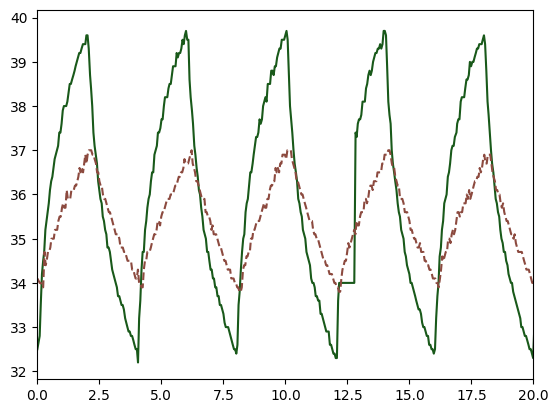

In [15]:
def plot_ther

4. Calibration and Alternative Methods

- Suggest a procedure to calibrate IR camera for accurate surface temperature measurements.

- Propose other thermal conductivity measurement techniques that are simple and cost-effective.